In [42]:
import pandas as pd
from math import sqrt
import os
import seaborn as sns
import duckdb

query = """
select aei.ano, aei.mes, count(*) as atendimentos
from main.atendimentos_em_ijui aei 
group by aei.ano, aei.mes 
order by aei.ano asc, aei.mes 
"""

In [43]:
database = duckdb.connect("database/database_pi.db")

rows = database.query(query).fetchall()

In [45]:
dataframe = pd.DataFrame(rows, columns=["ano","mes","atendimentos"])

print(f"Colunas para usar na análise logo abaixo {list(dataframe.columns)}")


dataframe = dataframe.query("atendimentos > 500")
print(dataframe.head(10))

column_x = "ano"
column_y = "atendimentos"

Colunas para usar na análise logo abaixo ['ano', 'mes', 'atendimentos']
     ano  mes  atendimentos
2   2014   10          4394
3   2014   11          4644
4   2014   12          4344
5   2015    1          5050
6   2015    2          5756
7   2015    3          4492
8   2015    4          5038
9   2015    5          4572
10  2015    6          6422
11  2015    7          4814


In [38]:
# COLOQUE AS COLUNAS QUE VC QUER USAR NESSE LUGAR AQUI Ó
try:
    list_x = list(dataframe["coloque a coluna do X"])
    list_y = list(dataframe["coloque a coluna do Y"])
    
    list_x = list(dataframe[column_x])
    list_y = list(dataframe[column_y])

    
except: 
    list_x = list(dataframe[dataframe.columns[0]])
    list_y = list(dataframe[dataframe.columns[1]])

n = len(dataframe)
print(f"\nN = {n}")

sum_of_x = sum(list_x)
print(f"Somatório de X = {sum_of_x}")
sum_of_y = sum(list_y)
print(f"Somatório de Y = {sum_of_y}")

sum_of_squared_x = sum([*map(lambda x : x**2, list_x)])
print(f"Somatório de X ao quadrado = {sum_of_squared_x}")
sum_of_squared_y = sum([*map(lambda y : y**2, list_y)])
print(f"Somatório de Y ao quadrado = {sum_of_squared_y}")

sum_of_xy = 0

for i in range(n):
    sum_of_xy += list_x[i] * list_y[i]

print(f"Somatório de X e Y = {sum_of_xy}")

part1 = sum_of_xy - ((sum_of_x * sum_of_y)/n)
print(f"\npart1 = {part1}")

part2 = sqrt(sum_of_squared_x - ((sum_of_x**2)/n))
print(f"part2 = {part2}")

part3 = sqrt(sum_of_squared_y - ((sum_of_y**2)/n))
print(f"part3 = {part3}\n")


correlation_coeficient = part1 / (part2 * part3)

print(f"Coeficiente de Correlação é = {correlation_coeficient}")


N = 9
Somatório de X = 18163
Somatório de Y = 449516
Somatório de X ao quadrado = 36655021
Somatório de Y ao quadrado = 28522614544
Somatório de X e Y = 907181478

part1 = 8243.777777791023
part2 = 8.299933065275951
part3 = 77916.54840632738

Coeficiente de Correlação é = 0.012747410767878754


In [39]:
b = ((n* sum_of_xy) - (sum_of_x * sum_of_y)) / ((n * sum_of_squared_x) - (sum_of_x ** 2))

print(f"Valor b é = {b}")

a = (sum_of_y / n) - (b * (sum_of_x/n))
print(f"Valor a é = {a}")

determination_coeficient = (correlation_coeficient ** 2) * 100
print(f"Valor do Coeficiente de Determinação = {determination_coeficient}\n")

print(f"ou seja, a equação de reta que melhor Representa o conjunto de dados, é: \n\nY = {round(a,2)} + {round(b,2)}*x \n")
print(f"e ela representa o conjunto de dados em {round(determination_coeficient, 2)}%")

Valor b é = 119.66774193548387
Valor a é = -191556.57741935484
Valor do Coeficiente de Determinação = 0.01624964812850312

ou seja, a equação de reta que melhor Representa o conjunto de dados, é: 

Y = -191556.58 + 119.67*x 

e ela representa o conjunto de dados em 0.02%


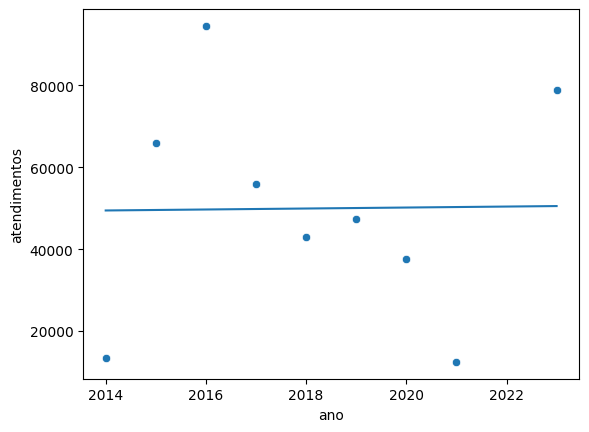

In [41]:
values_list_for_line = {}
for x in list_x:
    values_list_for_line[x] = (a+ b*x)

grafico = sns.scatterplot(data=dataframe, x=column_x,y=column_y)
grafico = sns.lineplot(data=values_list_for_line)